In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree #트리기반의 모델들

# 로지스틱 회귀의 문제점!

In [49]:
df = pd.read_csv("./data/wine.csv")

In [50]:
df.head() # 0 : 레드와인 , 1: 화이트와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- alcohol : 도수
- suger : 당도
- PH : ph값
- class : 타깃값. 0이면 레드 와인, 1이면 화이트 와인

In [51]:
df.shape

(6497, 4)

In [52]:
df.dtypes

alcohol    float64
sugar      float64
pH         float64
class      float64
dtype: object

In [53]:
df.isna().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

In [54]:
df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [55]:
x = df.drop("class", axis = 1)
y = df["class"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 33
)

In [57]:
x_train.shape, x_test.shape

((5197, 3), (1300, 3))

In [58]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.fit_transform(x_test)

In [59]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7814123532807389
0.7784615384615384


In [60]:
logi.coef_, logi.intercept_ # 여기서 해석할수있는것 이러한 확률이 화이트와인일 가능성이 높다...

(array([[ 0.52054014,  1.66398388, -0.71222374]]), array([1.79481591]))

- 로지스틱 모델은 이해하기 어려움
    - 왜 저런 계수값이 나왔는지 이해하기 어려움
    - 알코올 도수와 당도가 높을수록, ph가 낮을수록 화이트와인일 가능성이 높음
    - 만약에 다항특성과 하이퍼파라미터 튜닝이 추가되면 더 설명하기 어려운 모델이 됨

# 의사 결정 나무
<img src = "./image/decision_tree.png">

- 의의
    - 한 번에 하나씩의 독립변수를 사용하여 예측가능한 규칙들의 집합을 생성하는 알고리즘
    - 질문을 던져서 대상을 좁혀나가는 스무고개와 비슷한 개념
    - 분류와 회귀 모두 가능
        - 범주형 데이터, 연속형 데이터 모두 예측 가능
     
- 장점
    - 다른 지도학습 기법들에 비해 해석이 쉬움
    - 유용한 독립변수 파악가능
    - 선형성, 정규성, 등분산성 등의 수학적 가정이 불필요한 비모수적 모형임
    - **스케일링을 할 필요가 없음**
        - 스케일링이 의사결정나무 알고리즘엔 필요없음!
  
    - 교호작용 (시너지)를 보기에는 좋다!

- 단점
    - 성능이 떨어지는 경우가 많음
    - 분류 기준값의 경계선 주변의 자료에서는 오차는 클 수 있음 (1등급과 2등급의 차이가 2점밖에 안나는)
    - 각 예측 변수의 효과를 파악하기 어려움(그래서 많을수록 작을수록 뭔 효과가 일어나는가?...몰라잉)

In [61]:
dt = DecisionTreeClassifier(random_state=33)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test)) # 과대적합의심

0.9971137194535309
0.85


# 시각화

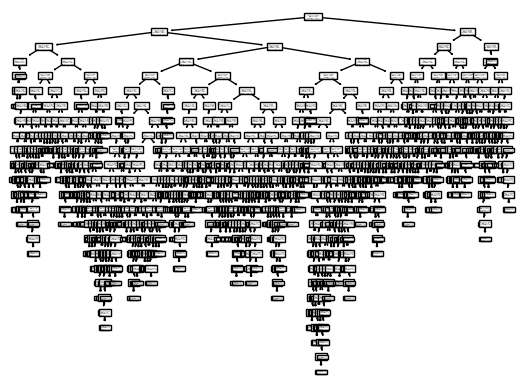

In [62]:
plt.figure()
plot_tree(dt)
plt.show()

- 뭔내용인지 모르겠다
- 모델이 너무 복잡하기 때문에 트리의 깊이를 제한해서 출력할 필요가 있음
    - max_depth : 루트 노드를 제외하고 더 확장하여 그릴 깊이
    - filled : 클래스에 맞게 색을 칠함
    - feature_names : 특성의 이름을 전달

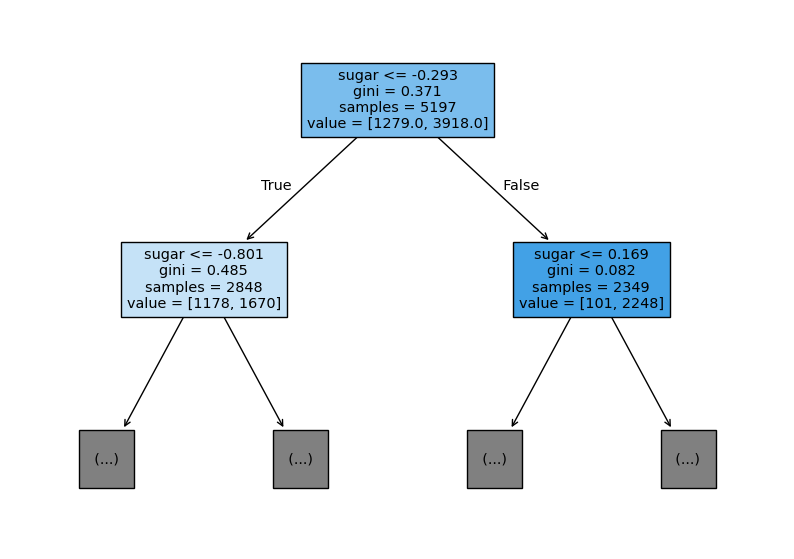

In [63]:
plt.figure(figsize=(10,7))
plot_tree(
    dt, max_depth = 1, 
    filled = True,
    feature_names = ["alcohol", "sugar", "PH"]
)
plt.show()

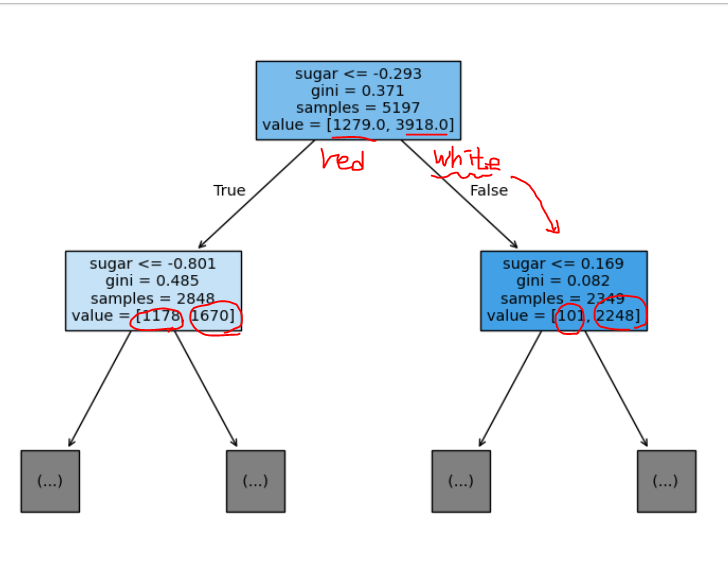

- 오른쪽 값(양성 클래스)이 클수록 blue~

### 시각화 해석 방법
- 맨 위의 노드를 ROOT NODE , 맨 아래노드를 LEAF NODE 라고 함

1. 루트 노드는 SUGAR 가 -0.293 이하인지 질문
   - 각 데이터 샘플의 sugar 가 -0.293 이하이면 왼쪽 가지로 이동
   - 그렇지 않으면 오른쪽 가지로 이동
   - 루트 노드의 총 샘플 수는 5197개
   - 이 중에서 음성 클래스(레드 와인)는 1279개
   - 양성 클래스(화이트 와인)는 3918개
     
2. 왼쪽 노드는 sugar가 -0.801 이하인지 질문
   - yes 는 왼쪽 가지, no는 오른쪽 가지로 이동
   - 노드의 총 샘플 수는 2848개
       - 음성클래스와 양성클래스 개수는 각각 1178개 , 1670개
     
3. 오른쪽 노드는 sugar 가 0.169 이하인지 질문
   - 노드의 총 샘플 수는 2349개
       - 음성 클래스와 양성 클래스 개수는 각각 101개, 2248개
    
- 왼쪽 노드는 색깔이 더 연해지고 오른쪽 노드는 더 진해짐
    - 양성 클래스의 비율이 높아질수록 진한 색으로 표시됨
 
- 예측 방법은 리프 노드에서 가장 많은 클래스가 예측 클래스가 됨

- 만약에 이 단계에서 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플 모두 양성 클래스로 예측됨

- 불순도
    - Gini impurity( 지니 불순도 )
    - DecisionTreeClassifier 의 criterion 매개변수의 기본값이 gini
    - criterion
        - 노드에서 데이터를 분할할 기준
        - 지니 불순도 계산식
            - 지니 불순도 = 1 - (음성클래스비율^2 + 양성클래스비율^2)
            - 예) 1 - ((1279/5197)^2 + (3918/5197)^2) = 0.371

# 최악의 지니 불순도 : 치킨 반반

In [64]:
1 - ((50 / 100) ** 2 + (50 / 100) ** 2 )

0.5

# 순수 노드의 지니 불순도 : 한쪽으로 다 쏠려

In [28]:
1 - ((0 / 100) ** 2 + (100 / 100) ** 2 )

0.0

- 따라서 의사결정나무 모델은 parent node(부모 노드)와 child node(자식 노드)의 불순도 차이가 가능한 크도록 트리를 성장시킴

# 불순도의 차이 공식

- 부모의 불순도 - (왼쪽 노드 샘플수 / 부모의 샘플수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수 ) * 오른쪽 노드 불순도

In [29]:
0.371 - (2848/5197) * 0.485 - (2349/5197) * 0.082

0.06815258803155666

### 0.068 이만큼 더 순수해졌다!!!

- 정보 이득 이라고 부름
- 정보이득이 최대가 되는만큼 트리를 성장시킴

- 이 때 사용하는 기준이 지니 불순도
- 사이킷런에서 제공하는 또 다른 불순도 기준으로 엔트로피 불순도가 있음

# 과대적합에 취약해! 어떻게 방지할것이냐!

### 가지치기

- 깊이에 제한을 두지 않고 무작정 끝까지 자라나는 트리를 만들게 되면 훈련 세트에는 아주 맞지만 테스트 세트에는 적합하지 않은 과대적합 모델이 되어 일반화가 잘 되지 않음

- 트리의 성장을 제한하는 방법이 가지치기
    - 가장 간단한 가지치기 방법은 트리의 최대 깊이를 지정하는 것

In [65]:
dt = DecisionTreeClassifier(random_state= 33)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.9971137194535309
0.85


In [67]:
dt = DecisionTreeClassifier(max_depth = 3, random_state= 33)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.8499134115836059
0.8338461538461538


# 시각화

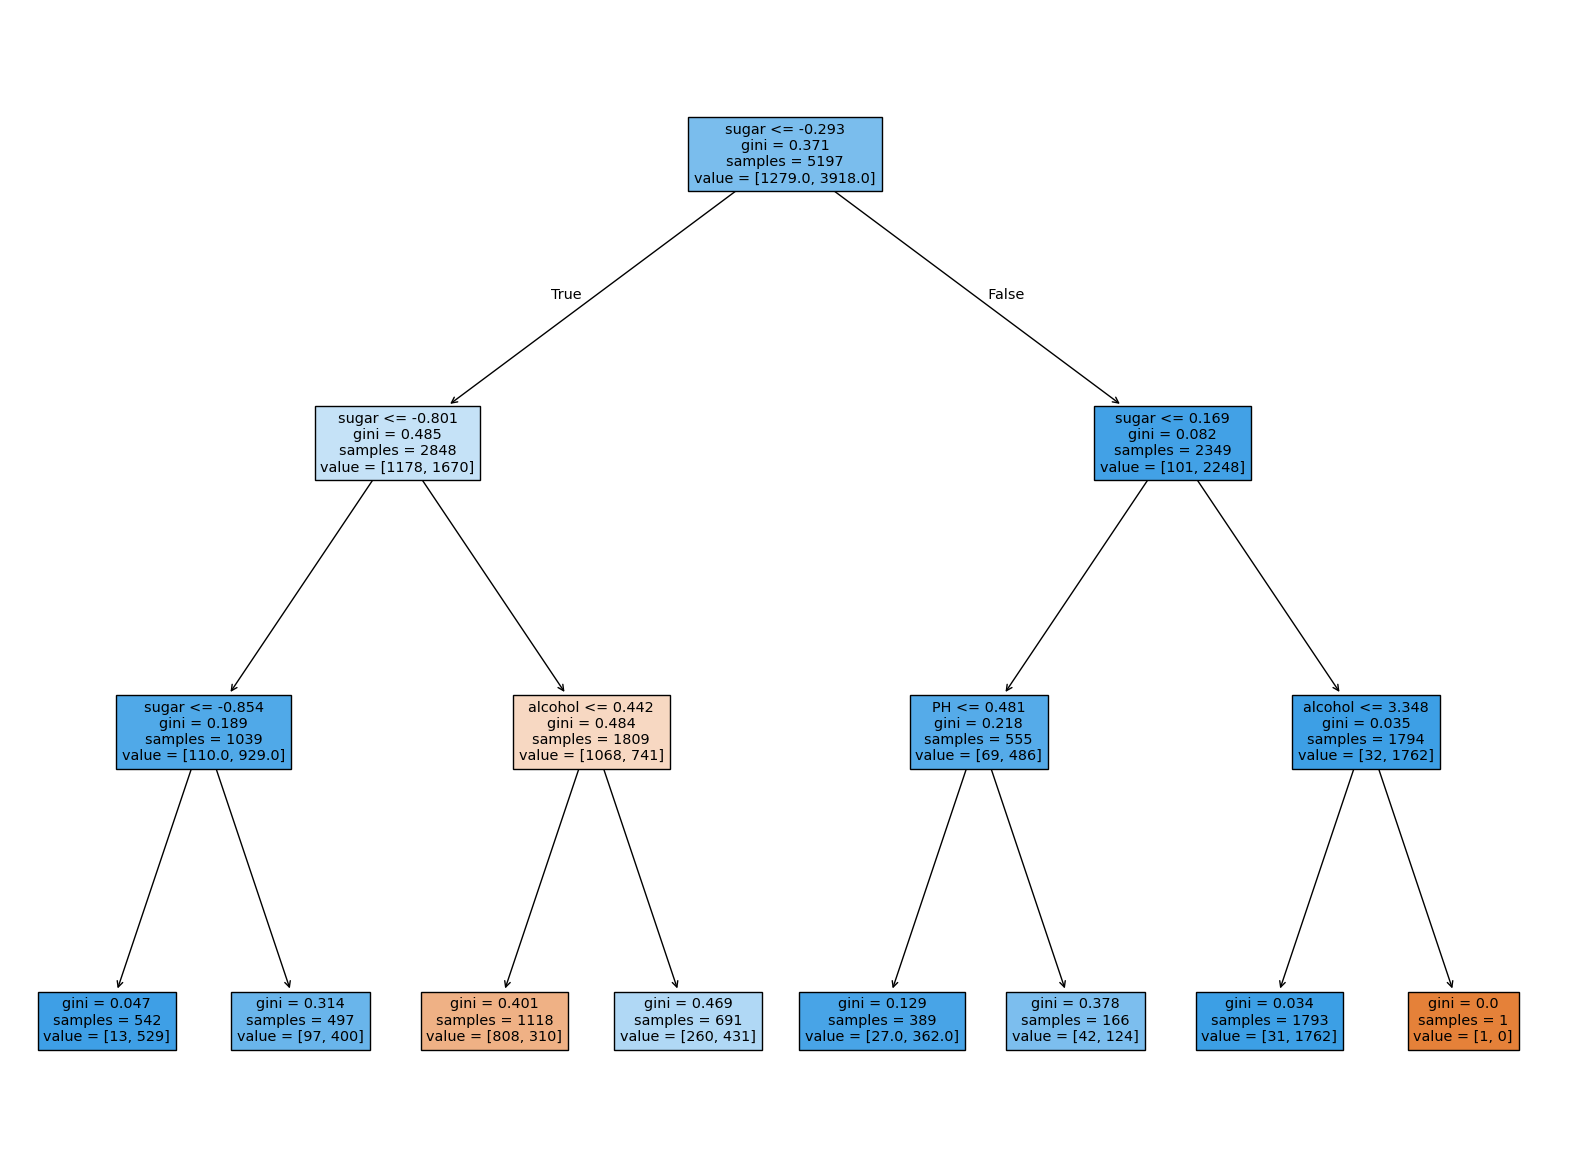

In [68]:
plt.figure(figsize = (20, 15))
plot_tree(
    dt,
    filled = True,
    feature_names= ["alcohol","sugar","PH"]
)
plt.show()

#### 당도가 -된다는게 말이안됨!-> 이대로 시각화로는 해석이 어려움

# 스케일링 하지 않는 데이따

In [71]:
dt = DecisionTreeClassifier(max_depth =3, random_state =33)
dt.fit(x_train, y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

0.8499134115836059
0.8361538461538461


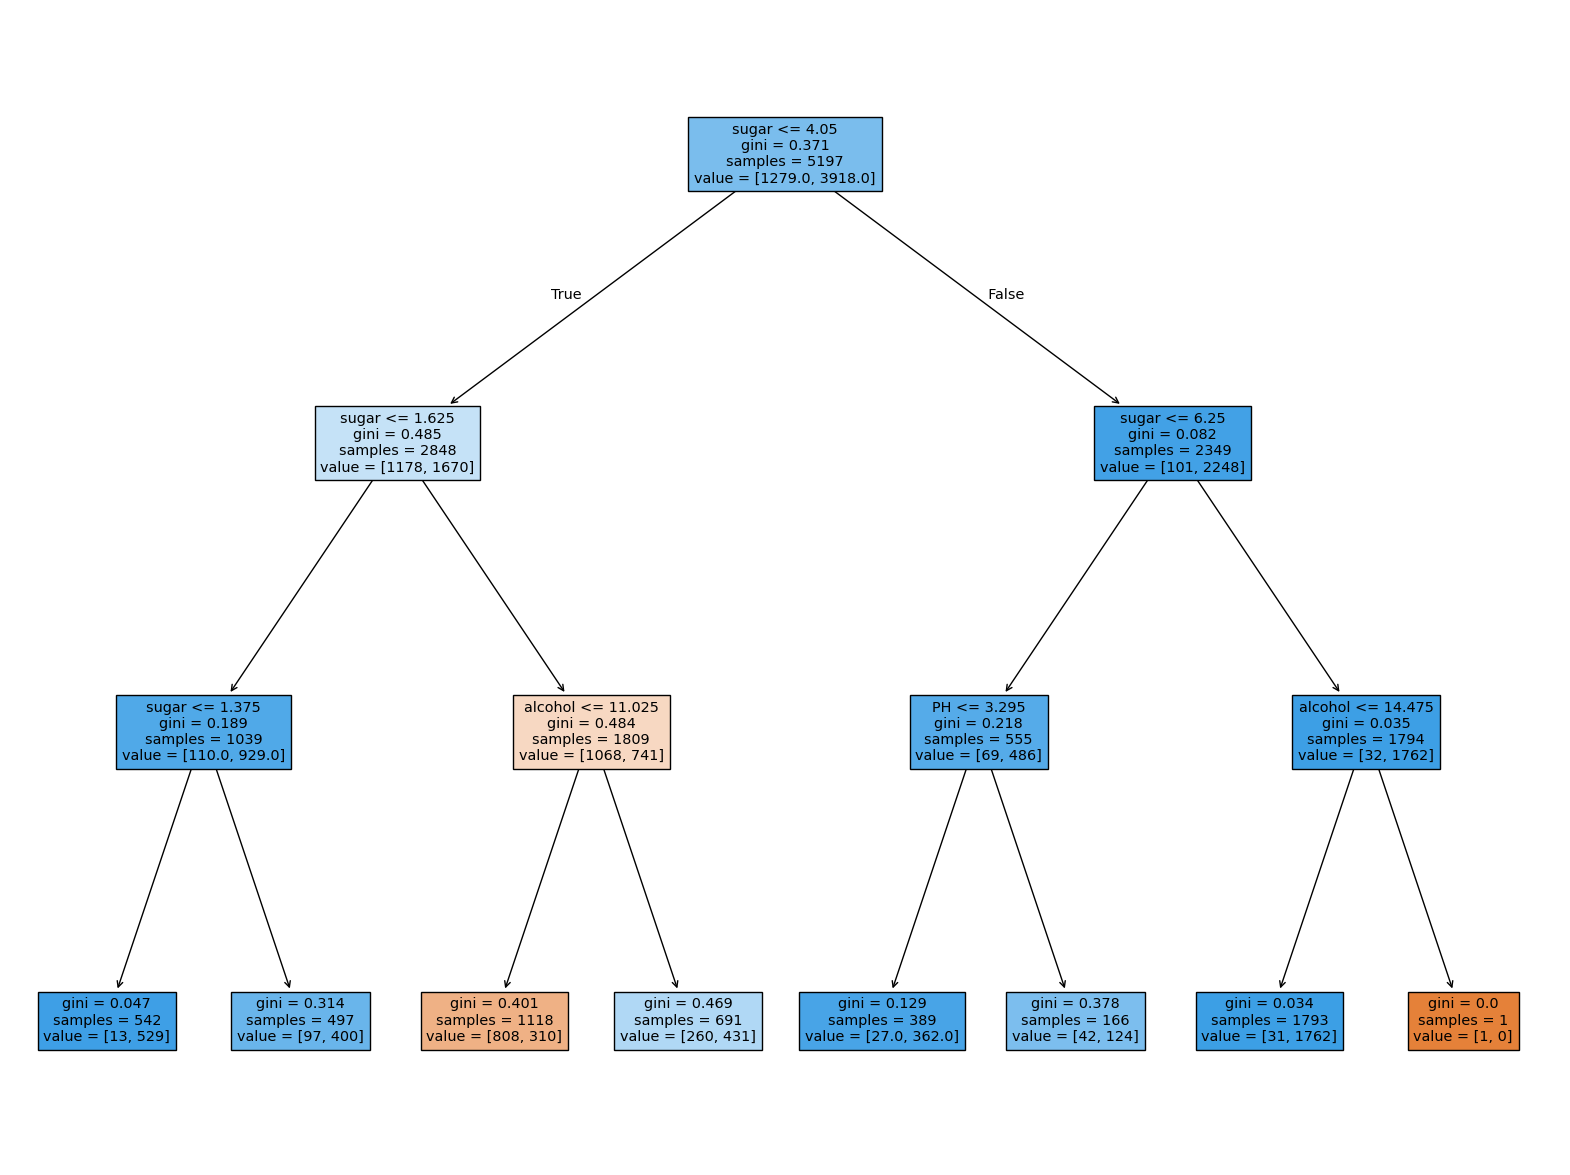

In [72]:
plt.figure(figsize = (20, 15))
plot_tree(
    dt,
    filled = True,
    feature_names= ["alcohol","sugar","PH"]
)
plt.show()

In [73]:
# 특성 중요도
print(dt.feature_importances_)

[0.13046251 0.85973942 0.00979807]


- 특성 중요도
    - 어떤 특성이 가장 유용한지 나타내는 지표
    - 두 번째 특성인 sugar 가 0.85로 가장 높음. alcohol, PH 순서
    - 각 노드의 정보이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산
    - 특성 중요도 활용 => 변수 선택 이용